In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# File to Load (Remember to change these)
train_data_to_load=  "data/train.csv"
test_data_to_load =  "data/test.csv"


# Read the train and test Data
train_data = pd.read_csv("data/train.csv")
train_data
test_data = pd.read_csv("data/test.csv")
test_data.head()

test_data["Survived"]=""

# Combine the data into a single dataset
#combined_data = pd.merge(train_data, test_data, how="left", on=["Name","Name"])
Combined_data = train_data.append(test_data)

# Display the data table for preview
Combined_data.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


problem statement
Complete the analysis of what sorts of people were likely to survive.
In particular, to predict which passengers survived the Titanic tragedy.

In [2]:
Combined_data.shape

(1309, 12)

In [3]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null object
Ticket         1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [4]:
Combined_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [5]:
Drop_data= Combined_data.drop(['Name','Ticket','Cabin'],axis =1)
Drop_data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,1,3,male,1,0
1,38.0,C,71.2833,0,2,1,female,1,1
2,26.0,S,7.9250,0,3,3,female,0,1
3,35.0,S,53.1000,0,4,1,female,1,1
4,35.0,S,8.0500,0,5,3,male,0,0


In [6]:
Drop_data["Age"].fillna(Drop_data.groupby("Sex")["Age"].transform("mean"),inplace=True)

In [7]:
Drop_data.isna().sum()

Age            0
Embarked       2
Fare           1
Parch          0
PassengerId    0
Pclass         0
Sex            0
SibSp          0
Survived       0
dtype: int64

In [8]:
Drop_data= Drop_data[~Drop_data["Fare"].isna()]

In [9]:
Drop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308 entries, 0 to 417
Data columns (total 9 columns):
Age            1308 non-null float64
Embarked       1306 non-null object
Fare           1308 non-null float64
Parch          1308 non-null int64
PassengerId    1308 non-null int64
Pclass         1308 non-null int64
Sex            1308 non-null object
SibSp          1308 non-null int64
Survived       1308 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 102.2+ KB


In [10]:
Drop_data= Drop_data[~Drop_data["Embarked"].isna()]
Drop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 417
Data columns (total 9 columns):
Age            1306 non-null float64
Embarked       1306 non-null object
Fare           1306 non-null float64
Parch          1306 non-null int64
PassengerId    1306 non-null int64
Pclass         1306 non-null int64
Sex            1306 non-null object
SibSp          1306 non-null int64
Survived       1306 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 102.0+ KB


In [11]:
mapping = {"female": 1, "male": 0}
Drop_data.Sex.replace(mapping, inplace=True)

In [12]:
mapping = {'S':0,'C':1,'Q':2}
Drop_data.Embarked.replace(mapping, inplace=True)

In [13]:
train = Drop_data[Drop_data["Survived"]!= '']

In [14]:
test = Drop_data[Drop_data["Survived"]== '']

In [15]:
train.shape, test.shape

((889, 9), (417, 9))

In [16]:
surv = train['Survived'].values
sex = train['Sex'].values
corrsex,psex = stats.pearsonr(surv,sex)
fare=train["Fare"].values
corrfare,pfare = stats.pearsonr(surv,fare)
age=train['Age'].values
corrage,page = stats.pearsonr(surv,age)
par = train['Parch'].values
corrpar,ppar = stats.pearsonr(surv,par)
clas = train['Pclass'].values
corrclas,pclas = stats.pearsonr(surv,clas)
si = train['SibSp'].values
corrsi,psi = stats.pearsonr(surv, si)
em = train['Embarked'].values
correm,pem = stats.pearsonr(surv, em)
print('Correlations:')
print(f'Sex-{corrsex}p={psex},Fare-{corrfare}p={pfare},Age-{corrage}p={page},Embarked-{correm}p={pem}')
print(f'Parch-{corrpar}p={ppar},Pclass={corrclas}p={pclas},Sibsp-{corrsi}p={psi}')

Correlations:
Sex-0.5415849155511635p=6.682012140632703e-69,Fare-0.25529046130469873p=1.0797887540537496e-14,Age--0.08244610928040144p=0.013934390270592265,Embarked-0.10866867101787511p=0.0011739618827510602
Parch-0.08315078366620161p=0.013136766201093403,Pclass=-0.33554885935682593p=7.776916288560928e-25,Sibsp--0.03403999879674952p=0.3106753734113154


In [17]:
#surv= list(train["Survived"])
#age = list(train['Age'])
#a_slope, a_int, a_r, a_p, a_std_err = stats.linregress(surv,age)

In [18]:
#train_Age_graph=train["Age"].fillna(train.groupby("Sex")["Age"].transform ("mean"), inplace= True)
#print(train_Age_graph)

In [19]:
#Age Analysis with respect to number of people boarded
train.hist(column="Age", bins = 15, figsize = (10,8))
plt.show()

plt.figure()
plt.hist(, histtype='barstacked', normed=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);
plt.show()

SyntaxError: invalid syntax (<ipython-input-19-65e5a6a9a9fb>, line 6)

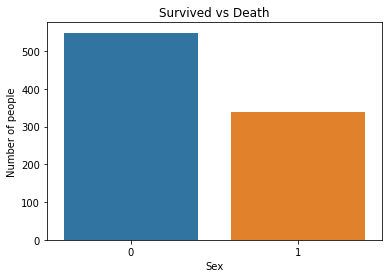

In [20]:
#Survived vs death in general
sns.countplot(train["Survived"])
plt.title("Survived vs Death")
plt.ylabel("Number of people")
plt.xlabel("Sex")
plt.show()

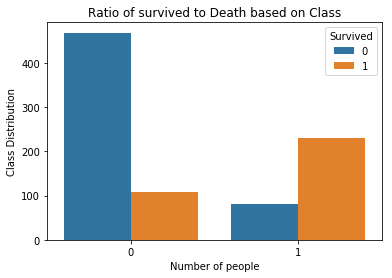

In [21]:
# survived to death comparison for men and women

sns.countplot(x=train["Sex"], hue=train["Survived"])
plt.title("Ratio of survived to Death based on Class")
plt.xlabel("Number of people")
plt.ylabel("Class Distribution")
plt.show()

In [22]:
#passenger class based on location of their seating arrplt.pie(part_class,labels=classes)

P1_class = (train['Pclass']==1).sum()
P2_class = (train['Pclass']==2).sum()
P3_class = (train['Pclass']==3).sum()
P1_class, P2_class, P3_class

classes = ['Higher and middle', 'middle', 'near to deck & Bottom']
part_class = [P1_class, P2_class, P3_class]

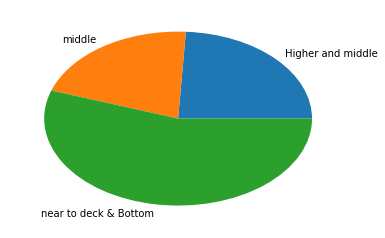

In [23]:
plt.pie(part_class,labels=classes)
plt.show()

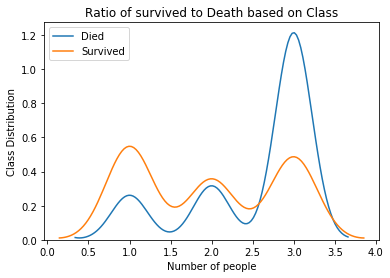

In [24]:
# survival to death plot based on their seating location

a = sns.kdeplot(train.Pclass[train.Survived== 0], label ="Died")
b = sns.kdeplot(train.Pclass[train.Survived== 1], label ="Survived")
plt.title("Ratio of survived to Death based on Class")
plt.xlabel("Number of people")
plt.ylabel("Class Distribution")
plt.show()

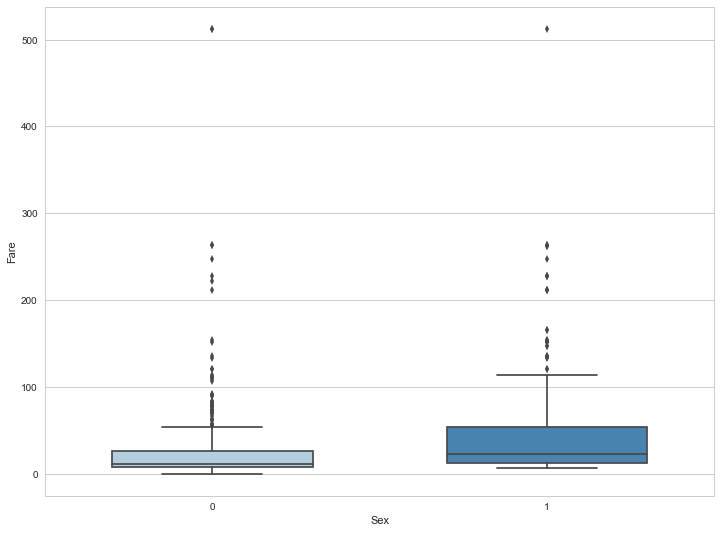

In [25]:
# Box plot fare between male vs female
from matplotlib import rcParams
sns.set(style="whitegrid")
rcParams['figure.figsize'] = 12,9
sns.boxplot( x=train["Sex"], y=train["Fare"],width=0.6, palette="Blues")


In [26]:
train.describe()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,29.716709,0.362205,32.096681,0.382452,446.000000,2.311586,0.350956,0.524184
std,12.975017,0.636157,49.697504,0.806761,256.998173,0.834700,0.477538,1.103705
min,0.420000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,22.000000,0.000000,7.895800,0.000000,224.000000,2.000000,0.000000,0.000000
50%,30.000000,0.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,35.000000,1.000000,31.000000,0.000000,668.000000,3.000000,1.000000,1.000000
max,80.000000,2.000000,512.329200,6.000000,891.000000,3.000000,1.000000,8.000000


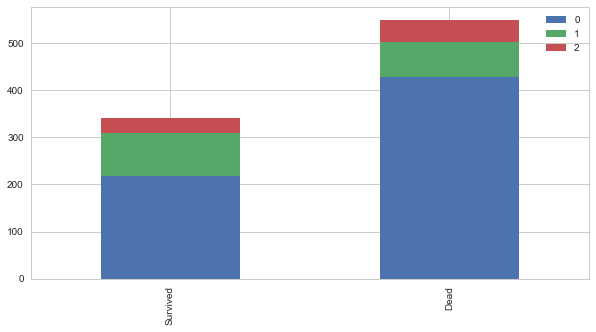

In [27]:
# Embarked station analysis
survived = train[train['Survived']==1].Embarked.value_counts()
dead = train[train['Survived']==0].Embarked.value_counts()
df = pd.DataFrame([survived,dead])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [40]:
#regression analysis
X_test = test.drop("Survived",axis=1)
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
Y_train=Y_train.astype('int')
regres = LogisticRegression()
#print(regres)
regres.fit(X_train, Y_train)

Y_pred = regres.predict(X_test)

acc_log = round(regres.score(X_train, Y_train) * 100, 2)
print(acc_log)

80.54


In [41]:
print(Y_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0
 1 1 1 1 1 0 1 0 0 0]


In [45]:
from sklearn.model_selection import cross_val_score
lr =  linear_model.SGDClassifier(n_iter=100)
scores = cross_val_score(lr, X_train, Y_train, cv=10, scoring = "accuracy")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is depr

In [47]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.64044944 0.62921348 0.69662921 0.75280899 0.62921348 0.38202247
 0.61797753 0.38202247 0.66292135 0.38636364]
Mean: 0.5779622063329929
Standard Deviation: 0.1327122261347345


In [50]:
X_train.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
0,22.0,0,7.2500,0,1,3,0,1
1,38.0,1,71.2833,0,2,1,1,1
2,26.0,0,7.9250,0,3,3,1,0
3,35.0,0,53.1000,0,4,1,1,1
4,35.0,0,8.0500,0,5,3,0,0


In [48]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(logistic_regression.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

NameError: name 'logistic_regression' is not defined